***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 10/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [1]:
from main import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
## DEBUGGING

In [7]:
%%time 
#Fitting for Model 1: (without CD) #using curve_fit
fit = Fitting('Sim_NonDynamic_Data_iCovg_iRates.csv','Atomic_1.csv','Stoich_1.csv','Param_1.csv',Input_Type='iCovg_iRates') #covgdep = Allowing for coverage dependance to be considered in the fit
fit.set_initial_coverages(init=[fit.Input.iloc[0,1],fit.Input.iloc[0,1],fit.Input.iloc[0,1],fit.Input.iloc[0,1]]) #Sets the initial coverages of all the surface species (Note: Empty Sites are calculated Automatically. If no option is entered, default initial coverage is zero surface species coverage on the surface)
fit.set_rxnconditions(Pr=[1e-6,2e-8,1e-12])
fit.set_limits_of_integration(fit.Input.iloc[0,0],fit.Input.iloc[-1,0])
fit.n_extract = 0.5

Mass is conserved. 

CPU times: user 25.2 ms, sys: 6.75 ms, total: 32 ms
Wall time: 31.8 ms


In [8]:
fit.PARAM()

name,value,initial value,min,max,vary
k1,2.00000000,2.0,0.00000000,inf,True
k2,6.6500e-09,6.65e-09,0.00000000,inf,True
k3,231.000000,231.0,0.00000000,inf,True
k4,115000.000,115000.0,0.00000000,inf,True
k5,6.1300e+08,613000000.0,0.00000000,inf,True
k6,0.02140000,0.0214,0.00000000,inf,True
k7,2.8500e-06,2.85e-06,0.00000000,inf,True
k8,500.000000,500.0,0.00000000,inf,True


In [7]:
fit.k = np.array([1e1, 1e-8, 1e2, 1e5,
 1e8, 1e-2, 1e-6, 1e2])
print(fit.k)

[1.e+01 1.e-08 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]


100 % of the Input dataset is being extracted for fitting (i.e 208 points are being extracted for fitting)

Performing fitting using LMFIT package:
--------------------------------------------------
-Using Method: leastsq

 Initial guess: 

-> Rate Constants:
 [1.e+01 1.e-08 1.e+02 1.e+05 1.e+08 1.e-02 1.e-06 1.e+02]

 Final predictions: 

-> Rate Constants:
 [2.00739308e+00 5.41620082e-11 2.31305686e+02 1.87547003e+04
 1.86294661e+07 3.98762679e-03 2.90094347e-06 1.70683120e-02]


<IPython.core.display.Javascript object>


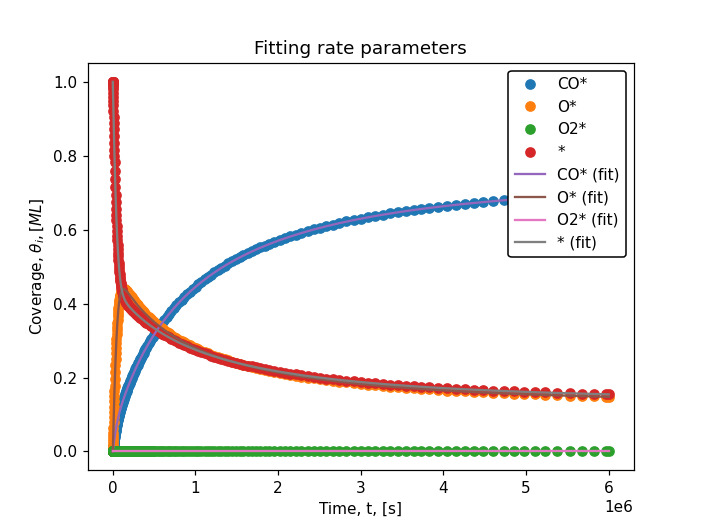

CPU times: user 23min 25s, sys: 4.39 s, total: 23min 30s
Wall time: 23min 30s


In [8]:
%%time 
#Fitting for Model 1: (without CD) #using LMFIT 
t1,covg1,fits1 = fit.fitting_rate_param(option='min',method_min='leastsq',maxfev = 1e9,plot=True) 